In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [7]:
audio_file = "./audio_data/15secsample_1.mp3"

In [8]:
ipd.Audio(audio_file)

In [40]:
y, sr = librosa.load(audio_file)
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (295420,)
sr: 22050


In [41]:
duration = len(y)/sr
duration

13.397732426303856

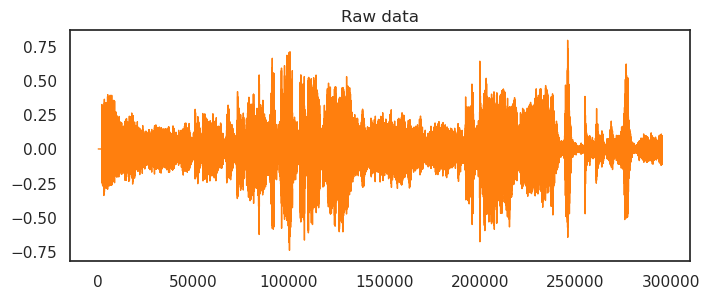

In [42]:
pd.Series(y).plot(figsize=(8, 3),
                  lw=1,
                  title='Raw data',
                 color=color_pal[1])
plt.show()

In [43]:
y = y[sr:]

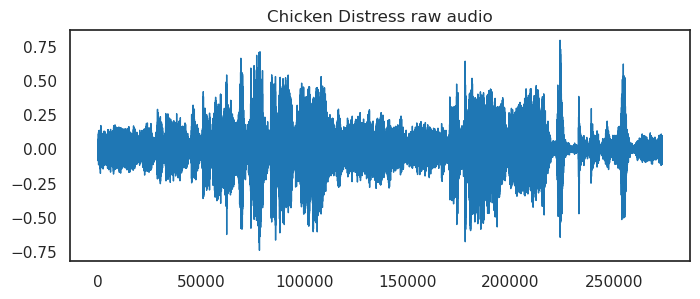

In [44]:
pd.Series(y).plot(figsize=(8, 3),
                  lw=1,
                  title='Chicken Distress raw audio',
                 color=color_pal[0])
plt.show()

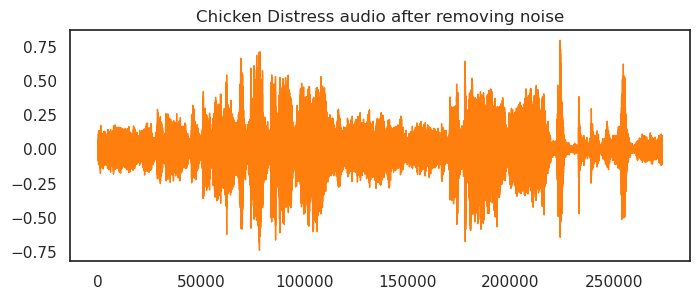

In [45]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(8, 3),
                  lw=1,
                  title='Chicken Distress audio after removing noise',
                 color=color_pal[1])
plt.show()

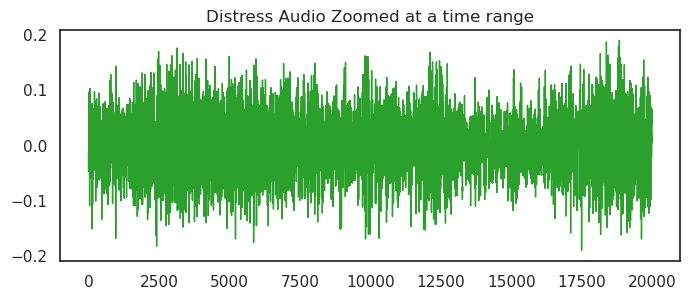

In [46]:
pd.Series(y[5000:25000]).plot(figsize=(8, 3),
                  lw=1,
                  title='Distress Audio Zoomed at a time range',
                 color=color_pal[2])
plt.show()

## spectogram

In [77]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 3230)

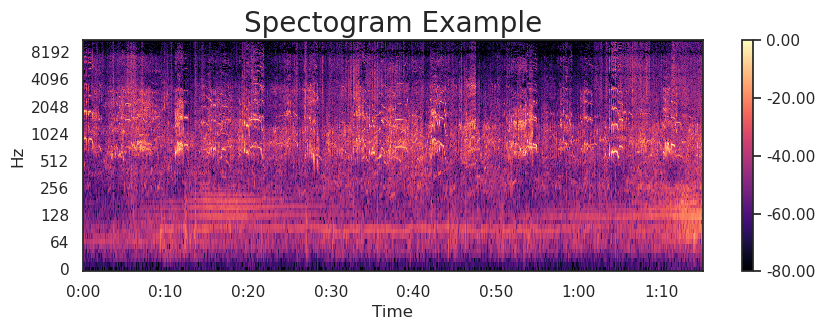

In [78]:
fig, ax = plt.subplots(figsize=(10, 3))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## mel spectogram

In [79]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

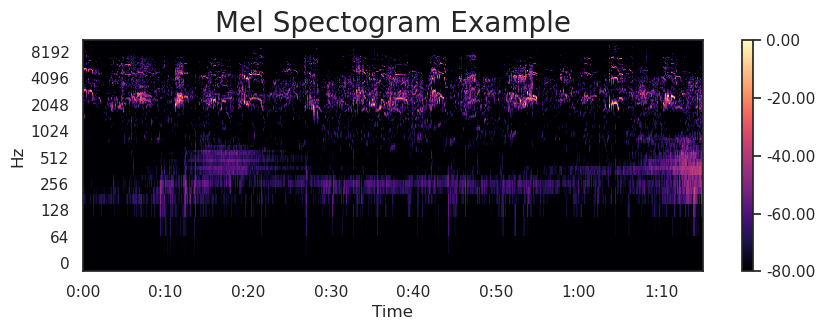

In [80]:
fig, ax = plt.subplots(figsize=(10, 3))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [3]:
# Load audio file
audio_path = './chicken_sound/15secsample_1.mp3'
y, sr = librosa.load(audio_path)

# Set the frequency range for chicken distress sounds
min_freq = 2300 # Minimum frequency range for chicken distress sounds
max_freq = 5000 # Maximum frequency range for chicken distress sounds

# Get the spectrogram of the audio file
spec = librosa.stft(y)

# Convert amplitude to decibel (dB)
spec_db = librosa.amplitude_to_db(abs(spec))

# Find the frequency bins that correspond to the chicken distress sound range
freq_bins = librosa.fft_frequencies(sr=sr, n_fft=spec.shape[0])
min_bin = np.argmin(np.abs(freq_bins - min_freq))
max_bin = np.argmin(np.abs(freq_bins - max_freq))

# Apply a spectral filter to the spectrogram to remove unwanted frequencies
spec_filtered = spec.copy()
spec_filtered[:min_bin, :] = 0
spec_filtered[max_bin:, :] = 0

# Reconstruct the audio signal from the filtered spectrogram
y_filtered = librosa.istft(spec_filtered)

# Save the filtered audio to a new file
# filtered_audio_path = './chick_s_s.wav'
# librosa.output.write_wav(filtered_audio_path, y_filtered, sr)
print(y_filtered, y_filtered.shape)


[-3.1172981e-14 -4.6627220e-12  1.4284328e-10 ... -7.7635892e-02
 -6.2775776e-02 -3.7001129e-02] (294912,)


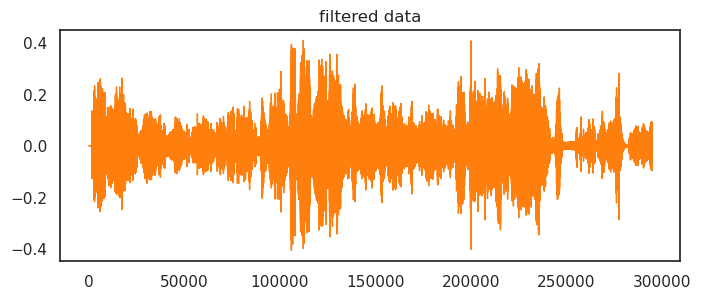

In [4]:
pd.Series(y_filtered).plot(figsize=(8, 3),
                  lw=1,
                  title='filtered data',
                 color=color_pal[1])
plt.show()

In [5]:
import soundfile as sf
sf.write('./chicken_sound/15_sec_chicken.wav', y_filtered, sr, 'PCM_24')